# EQUITY ONE-TOUCH OPTION

Analysis of equity options that trigger a payment (or non-payment) if a barrier is crossed at ANY time before expiry.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.market.curves.FinDiscountCurveFlat import FinDiscountCurveFlat
from financepy.products.equity import *

## Types of One Touch Option

In [3]:
for type in FinTouchOptionPayoffTypes:
    print(type)

FinTouchOptionPayoffTypes.DOWN_AND_IN_CASH_AT_HIT
FinTouchOptionPayoffTypes.UP_AND_IN_CASH_AT_HIT
FinTouchOptionPayoffTypes.DOWN_AND_IN_CASH_AT_EXPIRY
FinTouchOptionPayoffTypes.UP_AND_IN_CASH_AT_EXPIRY
FinTouchOptionPayoffTypes.DOWN_AND_OUT_CASH_OR_NOTHING
FinTouchOptionPayoffTypes.UP_AND_OUT_CASH_OR_NOTHING
FinTouchOptionPayoffTypes.DOWN_AND_IN_ASSET_AT_HIT
FinTouchOptionPayoffTypes.UP_AND_IN_ASSET_AT_HIT
FinTouchOptionPayoffTypes.DOWN_AND_IN_ASSET_AT_EXPIRY
FinTouchOptionPayoffTypes.UP_AND_IN_ASSET_AT_EXPIRY
FinTouchOptionPayoffTypes.DOWN_AND_OUT_ASSET_OR_NOTHING
FinTouchOptionPayoffTypes.UP_AND_OUT_ASSET_OR_NOTHING


## Valuation Parameters

In [4]:
valueDate = FinDate(1, 1, 2016)
expiryDate = FinDate(2, 7, 2016)
interestRate = 0.10
discountCurve = FinDiscountCurveFlat(valueDate, interestRate)
volatility = 0.20
barrierLevel = 100.0
model = FinEquityModelBlackScholes(volatility)
dividendYield = 0.02

# Cash Payoff One Touch Options

We consider cash payout options which trigger by the stock price falling.

In [5]:
stockPrice = 105.0
paymentSize = 15.0

In [6]:
downTypes = [FinTouchOptionPayoffTypes.DOWN_AND_IN_CASH_AT_HIT,
             FinTouchOptionPayoffTypes.DOWN_AND_IN_CASH_AT_EXPIRY,
             FinTouchOptionPayoffTypes.DOWN_AND_OUT_CASH_OR_NOTHING]

In [7]:
print("%60s %12s %12s" % ("Option Type", "Analytical", "Monte Carlo"))
for downType in downTypes:
    option = FinEquityOneTouchOption(expiryDate,downType,barrierLevel,paymentSize)
    v = option.value(valueDate,stockPrice,discountCurve,dividendYield,model)
    v_mc = option.valueMC(valueDate,stockPrice,discountCurve,dividendYield,model)
    print("%60s %12.5f %12.5f" % (downType, v, v_mc))

                                                 Option Type   Analytical  Monte Carlo
           FinTouchOptionPayoffTypes.DOWN_AND_IN_CASH_AT_HIT     10.01374      9.36308
        FinTouchOptionPayoffTypes.DOWN_AND_IN_CASH_AT_EXPIRY      9.63723      9.02479
      FinTouchOptionPayoffTypes.DOWN_AND_OUT_CASH_OR_NOTHING      4.63121      5.24365


In [8]:
stockPrice = 95.0
paymentSize = 15.0

In [9]:
upTypes = [FinTouchOptionPayoffTypes.UP_AND_IN_CASH_AT_HIT,
           FinTouchOptionPayoffTypes.UP_AND_IN_CASH_AT_EXPIRY,
           FinTouchOptionPayoffTypes.UP_AND_OUT_CASH_OR_NOTHING]

In [10]:
print("%60s %12s %12s" % ("Option Type", "Analytical", "Monte Carlo"))
for upType in upTypes:
    option = FinEquityOneTouchOption(expiryDate,upType,barrierLevel,paymentSize)
    v = option.value(valueDate,stockPrice,discountCurve,dividendYield,model)
    v_mc = option.valueMC(valueDate,stockPrice,discountCurve,dividendYield,model)
    print("%60s %12.5f %12.5f" % (downType, v, v_mc))

                                                 Option Type   Analytical  Monte Carlo
      FinTouchOptionPayoffTypes.DOWN_AND_OUT_CASH_OR_NOTHING     11.41029     10.93359
      FinTouchOptionPayoffTypes.DOWN_AND_OUT_CASH_OR_NOTHING     10.98686     10.54366
      FinTouchOptionPayoffTypes.DOWN_AND_OUT_CASH_OR_NOTHING      3.28158      3.72478


## Asset Payoff One Touch Options

In [11]:
downTypes = [FinTouchOptionPayoffTypes.DOWN_AND_IN_ASSET_AT_HIT,
             FinTouchOptionPayoffTypes.DOWN_AND_IN_ASSET_AT_EXPIRY,
             FinTouchOptionPayoffTypes.DOWN_AND_OUT_ASSET_OR_NOTHING]

In [12]:
stockPrice = 105.0

In [13]:
for downType in downTypes:
    option = FinEquityOneTouchOption(expiryDate, downType, barrierLevel)
    v = option.value(valueDate, stockPrice, discountCurve, dividendYield, model)
    v_mc = option.valueMC(valueDate, stockPrice, discountCurve, dividendYield, model)
    print("%60s %9.5f %9.5f" % (downType, v, v_mc))

          FinTouchOptionPayoffTypes.DOWN_AND_IN_ASSET_AT_HIT  66.75829  62.42053
       FinTouchOptionPayoffTypes.DOWN_AND_IN_ASSET_AT_EXPIRY  66.24680  63.25000
     FinTouchOptionPayoffTypes.DOWN_AND_OUT_ASSET_OR_NOTHING  37.70627  42.44246


In [14]:
stockPrice = 95.0

In [15]:
upTypes = [FinTouchOptionPayoffTypes.UP_AND_IN_ASSET_AT_HIT,
           FinTouchOptionPayoffTypes.UP_AND_IN_ASSET_AT_EXPIRY,
           FinTouchOptionPayoffTypes.UP_AND_OUT_ASSET_OR_NOTHING]

In [16]:
for upType in upTypes:
    option = FinEquityOneTouchOption(expiryDate, upType, barrierLevel)
    v = option.value(valueDate, stockPrice, discountCurve, dividendYield, model)
    v_mc = option.valueMC(valueDate, stockPrice, discountCurve, dividendYield, model)
    print("%60s %9.5f %9.5f" % (upType, v, v_mc))

            FinTouchOptionPayoffTypes.UP_AND_IN_ASSET_AT_HIT  76.06859  72.89062
         FinTouchOptionPayoffTypes.UP_AND_IN_ASSET_AT_EXPIRY  75.49345  73.89500
       FinTouchOptionPayoffTypes.UP_AND_OUT_ASSET_OR_NOTHING  18.55933  21.19295


In [17]:
print(option)

OBJECT TYPE: FinEquityOneTouchOption
EXPIRY DATE: SAT 02 JUL 2016
OPTION TYPE: FinTouchOptionPayoffTypes.UP_AND_OUT_ASSET_OR_NOTHING
BARRIER LEVEL: 100.0
PAYMENT SIZE: 1.0


## Vectorisations

We can vectorise two things at the same time as long as they have the same length

In [18]:
stockPrices = np.linspace(1,99,100)

In [19]:
stockPrices

array([ 1.        ,  1.98989899,  2.97979798,  3.96969697,  4.95959596,
        5.94949495,  6.93939394,  7.92929293,  8.91919192,  9.90909091,
       10.8989899 , 11.88888889, 12.87878788, 13.86868687, 14.85858586,
       15.84848485, 16.83838384, 17.82828283, 18.81818182, 19.80808081,
       20.7979798 , 21.78787879, 22.77777778, 23.76767677, 24.75757576,
       25.74747475, 26.73737374, 27.72727273, 28.71717172, 29.70707071,
       30.6969697 , 31.68686869, 32.67676768, 33.66666667, 34.65656566,
       35.64646465, 36.63636364, 37.62626263, 38.61616162, 39.60606061,
       40.5959596 , 41.58585859, 42.57575758, 43.56565657, 44.55555556,
       45.54545455, 46.53535354, 47.52525253, 48.51515152, 49.50505051,
       50.49494949, 51.48484848, 52.47474747, 53.46464646, 54.45454545,
       55.44444444, 56.43434343, 57.42424242, 58.41414141, 59.4040404 ,
       60.39393939, 61.38383838, 62.37373737, 63.36363636, 64.35353535,
       65.34343434, 66.33333333, 67.32323232, 68.31313131, 69.30

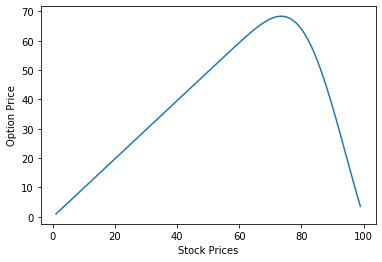

In [20]:
v = option.value(valueDate, stockPrices, discountCurve, dividendYield, model)
plt.plot(stockPrices, v)
plt.xlabel("Stock Prices")
plt.ylabel("Option Price");

And we can do the same to the option delta.

## Risk Analysis

The analytical model produced the following sensitivities

In [21]:
option.delta(valueDate, stockPrice, discountCurve, dividendYield, model)

-3.8710931871221987

In [22]:
option.gamma(valueDate, stockPrice, discountCurve, dividendYield, model)

0.020460078076212085

In [23]:
option.theta(valueDate, stockPrice, discountCurve, dividendYield, model)

27.6165601035057

In [24]:
option.vega(valueDate, stockPrice, discountCurve, dividendYield, model)

-76.95796756046036

In [25]:
option.rho(valueDate, stockPrice, discountCurve, dividendYield, model)

-73.72701358146827

Copyright (c) 2020 Dominic O'Kane